# Import all needed Libraries/Module

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [2]:
data = pd.read_csv('../Data/after_preprocessing.csv')
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
0,2,16.097862,0.932025,1,18.531612,958.584,1.2,1150.3008
1,4,14.619374,0.916687,1,17.397496,932.383,1.7,1585.0511
2,4,17.899918,0.997288,1,17.997414,977.578,1.9,1857.3982
3,3,13.532880,1.022786,1,12.936609,944.689,1.9,1794.9091
4,4,17.039484,1.053977,0,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
10721,72,95.444236,1.631113,1,35.874169,1510.154,1.3,1963.2002
10722,85,97.976899,1.631409,1,36.812724,1473.418,1.7,2504.8106
10723,50,97.761259,1.631864,1,36.711217,1635.925,1.7,2781.0725
10724,57,96.829324,1.631290,1,36.386871,1593.981,1.3,2072.1753


In [3]:
x=data.drop('calories_to_maintain_weight',axis=1)
y=data['calories_to_maintain_weight']

Normalization dapat mengontrol proses normalisasi secara fleksibel, seperti menentukan nilai rata-rata dan deviasi standar yang diinginkan, atau menggunakan statistik empiris dari data pelatihan. Normalisasi ini membantu dalam menjaga skala data yang konsisten, mempercepat konvergensi model, dan menghindari masalah gradien yang tidak stabil.

In [4]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(x.shape[1],),axis=-1)
normalizer.adapt(np.array(x))
print(normalizer.mean.numpy())

[2.6778576e+01 6.1647728e+01 1.5402758e+00 5.1948535e-01 2.4788317e+01
 1.4420499e+03 1.4874511e+00]


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,y_train.shape

((8580, 7), (8580,))

In [6]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1),
])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
history=model.fit(x_train, y_train, epochs=200, batch_size=4,
                  validation_split=0.2)

Epoch 1/200
1716/1716 [==============================] - 2s 1ms/step - loss: 531.5947 - val_loss: 73.8925
Epoch 2/200
1716/1716 [==============================] - 1s 760us/step - loss: 54.3241 - val_loss: 42.6609
Epoch 3/200
1716/1716 [==============================] - 1s 773us/step - loss: 36.8800 - val_loss: 32.5663
Epoch 4/200
1716/1716 [==============================] - 1s 778us/step - loss: 28.2371 - val_loss: 26.3209
Epoch 5/200
1716/1716 [==============================] - 1s 776us/step - loss: 23.1769 - val_loss: 21.0337
Epoch 6/200
1716/1716 [==============================] - 1s 791us/step - loss: 19.5102 - val_loss: 17.5161
Epoch 7/200
1716/1716 [==============================] - 1s 768us/step - loss: 17.2982 - val_loss: 15.3438
Epoch 8/200
1716/1716 [==============================] - 1s 752us/step - loss: 14.9474 - val_loss: 13.9336
Epoch 9/200
1716/1716 [==============================] - 1s 736us/step - loss: 13.1746 - val_loss: 11.3816
Epoch 10/200
1716/1716 [==============

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_loss(history,start,end):
  x_index=[x for x in range (start,end)]
  plt.plot(x_index,history.history['loss'][start-1:end-1], label='loss')
  plt.plot(x_index,history.history['val_loss'][start-1:end-1], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss MAE')
  plt.title(f'Loss betweeh epoch {start} and {end}')
  plt.legend()
  plt.grid(True)
  plt.show()

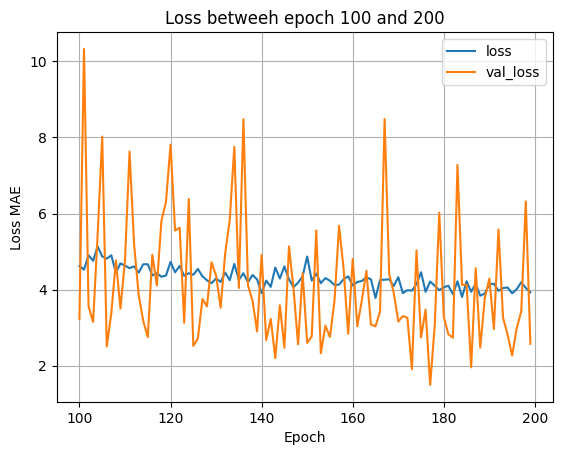

In [8]:
plot_loss(history,100,200)

In [9]:
model.evaluate(x_test,y_test)

68/68 [==============================] - 0s 862us/step - loss: 7.4995


7.499527454376221

In [10]:
predict=model.predict(x_test)
predict.squeeze()

array([1527.4813, 1827.5636, 1472.6307, ..., 2110.8088, 2089.8167,
       1450.4471], dtype=float32)

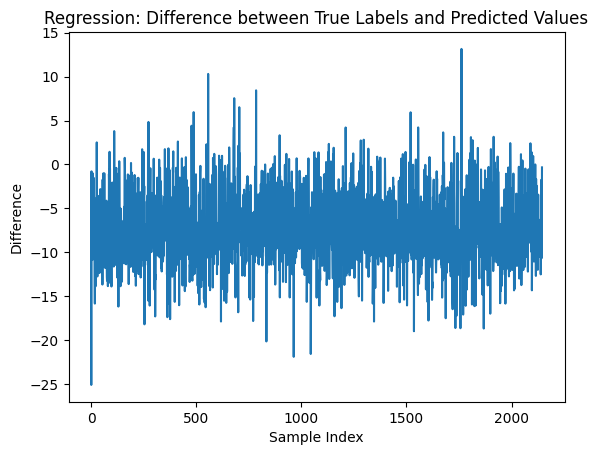

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your true labels in a NumPy array called 'y_true'
# Assuming you have your predicted values in a NumPy array called 'y_pred'

# Calculate the difference between true labels and predicted values
diff = y_test - predict.squeeze()

# Plotting the difference
plt.plot(np.arange(len(diff)), diff)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Regression: Difference between True Labels and Predicted Values')
plt.show()


In [12]:
diff.describe()

count    2146.000000
mean       -7.324989
std         4.119444
min       -25.100099
25%       -10.053047
50%        -7.556084
75%        -4.716586
max        13.150942
Name: calories_to_maintain_weight, dtype: float64

hasil= y true - predict

* y true= data asli -> y_test
* predict= data prediksi -> hasil predict model terhadap x_test

if hasil<0 -> kalori yg diprediksi berlebihan

if hasil >0 -> kalori yg diprediksi kurang

In [13]:
sorted(diff) #jumlah kalori yang diprediksi berlebih

[-25.100098632812433,
 -21.901653515625185,
 -21.5766455078126,
 -20.149245898437584,
 -18.98778710937495,
 -18.67938281250008,
 -18.643880859374804,
 -18.622725000000173,
 -18.20300253906271,
 -17.88315820312482,
 -17.880408203124716,
 -17.825994921875008,
 -17.770502343750195,
 -17.613047265625028,
 -17.506821484374996,
 -17.388177343749703,
 -17.303502734374888,
 -17.284010546874924,
 -17.238617187499585,
 -17.09111914062487,
 -16.989128515625453,
 -16.829556250000223,
 -16.479803515625008,
 -16.361513671874945,
 -16.255968750000193,
 -16.180741406250036,
 -16.130493749999914,
 -16.091957031249876,
 -16.06787695312505,
 -16.060365234374785,
 -16.04912695312487,
 -16.04537500000015,
 -16.026857421874865,
 -15.945970703125113,
 -15.943017578124909,
 -15.845488671875046,
 -15.841611328125055,
 -15.839978515624807,
 -15.835521484375022,
 -15.801140624999789,
 -15.761219921875181,
 -15.760883984375141,
 -15.759126953124905,
 -15.758803515625004,
 -15.757642578124887,
 -15.72903515625012,

In [14]:
sorted(diff, reverse=True) #jumlah kalori yang diprediksi kekurangan kalori

[13.150942382812445,
 10.30334960937489,
 8.436174804687425,
 7.541945898437461,
 6.514365820312605,
 5.953750585937314,
 5.935771289062586,
 4.837385742187507,
 4.407887695312411,
 4.229026367187544,
 4.214951757812514,
 4.208147460937425,
 3.793856835937504,
 3.6474931640625528,
 3.321981445312531,
 3.14813457031255,
 3.1461827148438033,
 3.109180078125064,
 2.8160302734377183,
 2.7596982421875964,
 2.733796484375034,
 2.6101306640625808,
 2.509841992187603,
 2.427174023437601,
 2.405903320312518,
 2.34050000000002,
 2.2974900390624953,
 2.1373181640624352,
 1.9756009765624185,
 1.9400728515624905,
 1.9014878906250487,
 1.8840583984374462,
 1.8323388671874454,
 1.7970029296880057,
 1.7458078125000611,
 1.7387615234374607,
 1.7293251953124127,
 1.4913154296875746,
 1.438351953124993,
 1.4236005859372654,
 1.4218548828125677,
 1.4172146484374935,
 1.401737695312704,
 1.3969951171875437,
 1.3721728515627092,
 1.2996416015625982,
 1.2772203125000487,
 1.2554443359374545,
 1.2498085937500

In [15]:
model.save('Model_4.h5')  #evaluate loss: 1.8123